In [13]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# load
img = cv2.imread('../data/img/dapi.TIF')
cv2.imshow('original image', img)
cv2.waitKey(0)
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
blur = cv2.GaussianBlur(img_gray, (1, 1), cv2.BORDER_DEFAULT)

cv2.imshow('blurred image', blur)
cv2.waitKey(0)

ret3, th3 = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow('OTSU', th3)
cv2.waitKey(0)

params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.maxArea = 25000
params.filterByConvexity = False
params.filterByInertia = False
params.filterByCircularity = False

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(th3)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(th3,
                                      keypoints,
                                      np.array([]),
                                      (0, 0, 255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

cv2.destroyAllWindows()

df = pd.DataFrame([{'size': x.size, 'x': x.pt[0], 'y': -1*x.pt[1]} for x in keypoints])

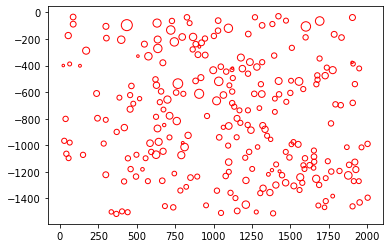

In [21]:
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], s=df['size'], c='none', edgecolor='r')
plt.show()